# Mushroom Classification

# Abstract

In the food industry, it is essential to know if a mushroom is safe to consume (edible) or not (poisonous).

A machine learning algorithm will assess whether a mushroom is a safe food or a lethal toxin by following seven steps.

Logistic Regression has been selected as the model to use moving forward in order to complete our classification task. That's due to our problem, where the value of our target variable has a binary output, either belongs to one class (edible) or another (poisonous).

An accuracy score of 100% was achieved twice; firstly, by using label encoding, a splitting strategy like K-fold Cross-Validation and an optimizer like GridSearchCV and secondly, by using One hot encoding and the Hold-out method.

Finally, provided some insights on the reliability of these two models.

# Objectives

* Discover where to obtain and gather open-sourced datasets so that we may begin building a machine learning model
* Gain knowledge of how crucial data preparation is to the machine learning process
* Find out how to feed the preprocessed data into a machine learning algorithm and assess the model using metrics like accuracy score and confusion matrix
* Learn how to measure a model's stability with respect to constantly changing training and test data by using an alternative splitting approach to the conventional one, the holdout method
* Tune a model's parameters using a method that finds the optimal parameter values from the supplied grid of parameters in order to improve a model's performance
* Understand the difference between label encoding and one hot encoding

# What sets my tutorial apart from other comparable online tutorials

I needed to find a way to make my tutorial stand out, in addition to clearly demonstrating the process used so the reader can understand everything right away.
<br>
<br>
I discovered that no tutorial demonstrates more than one strategy at doing the mushroom classifciation task in its entirety.
<br>
<br>
In light of the fact that doing so might eventually boost a person's cognitive growth, I decided that compiling all relevant resources into a comprehensive tutorial would be the ideal action to take.
<br>
<br>
<br>

## Summary of the approach
### The 7 Machine Learning stages are the following:
[1. Collecting Data](#1.-Collecting-Data)
<br>
[2. Exploratory Data Analysis and Data Preprocessing](#2.-Exploratory-Data-Analysis-and-Data-Preprocessing)
<br>
[3. Choosing a model](#3.-Choosing-a-model)
<br>
[4. Training the model](#4.-Training-the-model)
<br>
[5. Evaluating the model](#5.-Evaluating-the-model)
<br>
[6. Parameter Tuning](#6.-Parameter-Tuning)
<br>
[7. Making Predictions](#7.-Making-Predictions)

Let's delve into it to get a better understanding of what each stage really does.

### 1. Collecting Data

The most crucial phase of tackling any supervised machine learning issue is data collection. The most popular primary data gathering techniques include interviewing, observing, completing surveys and questionnaires, holding focus groups, recording oral histories, and web scraping.

We are fortunate, though, since Kaggle exists.

Kaggle is an online community for machine learning and data science aficionados. Users of Kaggle have the ability to work collaboratively, access and publish datasets, use notebooks with GPU integration, and compete with other data scientists to tackle data science issues [3].

That being said, adopting an open-sourced dataset from the UCI Machine Learning [2] that has been posted on Kaggle would significantly simplify our lives.

In [1]:
import warnings
warnings.filterwarnings("ignore") # Hide all warnings 

In [2]:
%%capture

! pip install pandas
import pandas as pd

def get_df_from_file():
    missing_values = ["na", "?"] # Potential representation of missing values in the dataset
    df = pd.read_csv('mushrooms.csv', na_values = missing_values) # Load dataset into a Pandas dataframe
    
    return df


# Get a dataframe that includes the whole dataset
df = get_df_from_file()

<u>Notes:</u> 
1. The %%capture magic function is used to hide the cell's output, in order to prevent us from seeing all of the output of downloading a library.
2. We only utilise functions for such simple tasks since we'll reuse the code farther down in the process.

<br>

### 2. Exploratory Data Analysis and Data Preprocessing

#### What is Exploratory Data Analysis?
As its name implies, this stage is when we attempt to investigate the data through analysis.

#### Okay, but what exactly is the purpose of analyzing our data?
Think of it this way. In the absence of data, no model can be trained, no insights can be obtained, and no time is squandered; nevertheless, in the presence of flawed data, several models may be trained, numerous insights can be obtained, and time is unquestionably wasted.

#### That seems reasonable, but how can we examine our data effectively?
There are numerous ways to examine our data. Let's look at several methods below for understanding and visualising our data.

<br>
<br>

####  Understanding the data

In [3]:
df.head() # Show the first 5 rows of the dataframe

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<br>
<br>

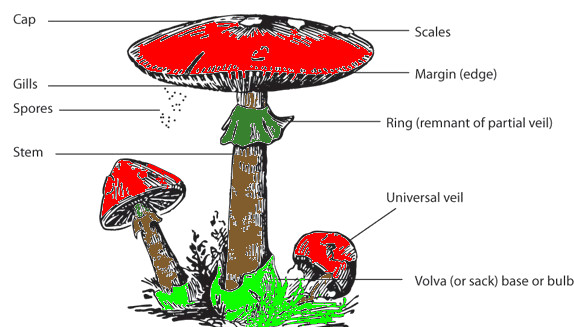

The image was taken from an [Analytics Vidhya's article](https://medium.com/analytics-vidhya/mushroom-classification-edible-or-poisonous-9327a56c6fc9) but colors were added to it via the [GIMP software](https://www.gimp.org/).
<br>
<br>

Based on the 10 features that are shown in the image above, our dataset has the following:
<br>
 - 3 features for Cap (shape, surface, color)
 - 4 features for Gill (attachment, spacing, size, color)
 - 6 features for Stalk (shape, root, surface above ring, surface below ring, color above ring, color below ring)
 - 2 features for Veil (type, color)
 - 2 features for Ring (number, type)
 - 1 feature for Spores (color)
 - 4 additional features (bruises, odor, population, habitat)
 - and our target variable/label, class

<br>
<br>
<br>

In [4]:
df.shape # Show the rows and columns of the dataframe

(8124, 23)

#### What do these two number show?
They indicate that our dataset consists of 23 variables in total from which 22 are the independent variables (features) and the other is the dependent variable (label) that characterise a mushroom having 8124 instances (single rows of data). All these features contribute in defining (the label) whether a mushroom is poisonous or edible.
<br>
<br>
<br>

In [5]:
df.dtypes # Show the datatype of each column of the dataframe

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### How about this column of only objects in a single column?
It indicates that every feature has a datatype of object; meaning that every feature contains categorical data.

#### What is categorical data?
Think of it this way. Only numbers are capable of producing numerical data. Every other type of data is categorical; it is a collection of information that has been classified into groups.
<br>
<br>
<br>

In [6]:
df.describe() # Show a description of the data of the dataframe

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Since our data is categorical, weren't we supposed to use df.describe(include[object]) method instead?
Indeed, normally the function df.describe(include[object]) needs to be used in order to display the statistical summary of categorical data.
<br>
<br>
However, as there is no numerical data in our dataset, even when using df.describe(), a statistical summary of the categorical data will be shown.
<br>
<br>
<br>

In [7]:
df['class'].unique() # Show the unique values of the column class

array(['p', 'e'], dtype=object)

It is clear that our target variable "class" only contains the values "p" and "e", which stand for poisonous and edible, respectively.
<br>
<br>

#### Checking for missing data

In [8]:
df.isnull().values.any() # Check if there is any NaN value in the dataframe

True

Missing data is present in our dataset.
<br>
<br>
<br>

In [9]:
df.isnull().sum() # Show the total number of missing values each column has

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

It is evident that the only variable that has missing data is the "stalk-root".
<br>
<br>
<br>

In [10]:
df['stalk-root'].value_counts() # Show how many times each unique value occurs in the 'stalk-root' column

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

The most frequent value is the value "b" which stands for bulbous; thus, we will utilise the variable's mode to replace the 2480 missing values with that letter.

In [11]:
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True) # Replace NaN values with the mode's value

If you're curious about how I know "b" was standing for bulbous, you can have a look at [mushroom.csv's "Detail" section](https://www.kaggle.com/datasets/uciml/mushroom-classification).

<br>
<br>

#### Visualising the data

Most frequently, histograms are used to visualise outliers in numerical data.
<br>
However, since we only have categorical data, count plots—which are histograms spanning categorical variables—must be employed.

In [12]:
%%capture

! pip install matplotlib
! pip install seaborn

from matplotlib import pyplot as plt
import seaborn as sns

<br>
<br>
<br>
This will allow us to examine how often each value appears throughout its corresponding variable in respect of our label, 'class'.

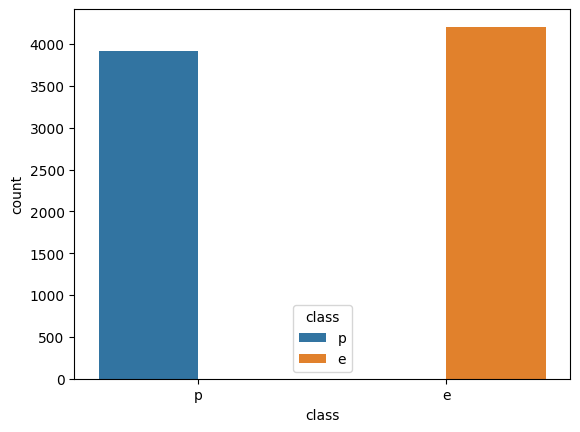

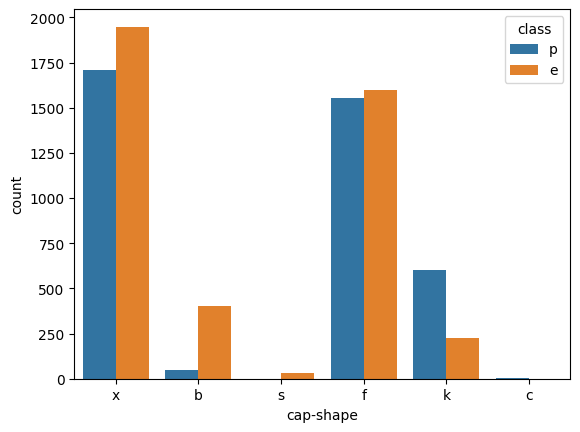

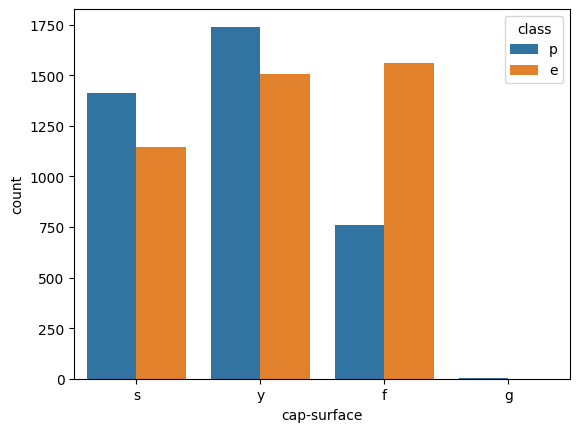

In [13]:
# Create a countplot for every variable and color encode the value in respect of our label
for i, col in enumerate(df.columns):
    # Create a figure for each variable of the dataset
    plt.figure(i)

    # Plot the figure for the specific variable and its corresponding values by color encoding them
    sns_plot = sns.countplot(x=col, # Variable 
                             hue='class', # Color encoding based on our label
                             data=df # Dataset
                            )
    
    # Stop the loop at the third column
    if i == 2:
        break

<u>Note:</u> For convenience, just the countplots of the first three variables were displayed.

<br>
<br>

#### Checking if the dataset is balanced or imbalanced

The first countplot above may have already led us to infer that the proportion of edible to deadly mushrooms is almost equal.
<br>
However, all scepticism will be dispelled by discovering how many times each unique value of the target variable occurs.

In [14]:
df['class'].value_counts() # Show how many times each unique value occurs in the 'class' column

e    4208
p    3916
Name: class, dtype: int64

As can be seen, the edible and poisonous mushrooms are equal to 4208 and 3916 respectively which are close. 
<br>
<br>
That being said, it can be concluded that the dataset is balanced.
<br>
<br>


#### Encoding the categorical variables

The data encoding technique employed is the label encoding where as its name suggests, it transforms the labels into a numeric form.

In [15]:
%%capture

! pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

In [16]:
def encode_data(data):
    le = LabelEncoder() # Initialize label encoder
    
    # Loop through all the columns
    for col in data:
        df[col] = le.fit_transform(df[col]) # Encode column
        
    return df
      

# Get encoded dataframe
df = encode_data(df.columns)

#### Why do we need to encode our data?
Machine learning models require all input and output variables to be numeric. 
<br>
Since all of our data is categorical, it must first be converted to numbers before we can fit and evaluate our model. 
<br>
<br>
<br>

We must ensure that the encoded values are all distinct from one another.

In [17]:
# Check that all the encoded values are different between them
print(df['population'].unique(), "\n")

[3 2 0 4 5 1] 



In [18]:
# Check the size of the encoded values of the label 'class'
print(df.groupby('class').size()) # 0 and 1

class
0    4208
1    3916
dtype: int64


The fact that the encoded values have the same quantity as the uncoded values further demonstrates the success of the label encoding (4208, 3916). Thus, it follows that the numbers 0 and 1 correspond to edible and poisonous mushrooms, respectively.
<br>
<br>
<br>

#### Splitting data
Our data is frequently divided into training and test sets when we are building a machine learning model utilising certain data.

##### What is the difference between the Train set and Test set?
The model is trained using the training set, then it is tested with data (test set) that it has never seen before.
#### But why use data that has never been seen before?
Training a model with such data, a final unbiased model performance assessment can be reached. More about it will be discussed further below at the Parameter Tuning stage.
<br>
<br>

First, let's demonstrate how we divide the dataset's features and label.

In [19]:
features = df.iloc[:, 1:] # All rows, all the features and no label

features.head() # Show the first five rows of the 'features' dataframe

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [20]:
target = df.iloc[:, 0] # All rows, label only

target.head() # Show the first five rows of the 'target' dataframe

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

<br>
<br>
<br>
To ensure that the forms are in line to have a correct fit while training, it is necessary to examine the sizes of both the features and the target.
<br>
Otherwise, the process of learning could be disrupted by different shapes.

In [21]:
print("Shape of features is ", features.shape)
print("Shape of target is ", target.shape)

Shape of features is  (8124, 22)
Shape of target is  (8124,)


<u> As expected, we have: </u>
 - only one target (class)
 - 21 features (22 (features) - 1 (a feature has been dropped) = 21)
 - 8124 instances for both features and target

<br>

In [22]:
from sklearn.model_selection import train_test_split

def split_data(features, target):
    
    # Split the dataset into Train set and Test set
    train_features, test_features, train_target, test_target = \
                                    train_test_split(features, target, test_size=0.2, random_state=42)
    
    return train_features, test_features, train_target, test_target


# Get Train set and Test set
train_features, test_features, train_target, test_target = split_data(features, target)

The distinction between the train and test set was already covered above.
<br>
<br>
A common split when using the hold-out approach employs 80% of the data for training and 20% for testing.

#### Why exactly the numbers 80 and 20?
Empirical studies show that the best results come from using 20–30% of the data for testing and the rest 70–80% for training. 
<br>
Read the [Why 70/30 or 80/20 Relation Between Training and Testing Sets:
A Pedagogical Explanation](https://scholarworks.utep.edu/cgi/viewcontent.cgi?article=2202&context=cs_techrep) paper for more details.
<br>
<br>
<br>

Let's check if the data split was successful.

In [23]:
print("Shape of features in the train set: ", train_features.shape)
print("Shape of target in the train set: ", train_target.shape)
print("Shape of features in the test set: ", test_features.shape)
print("Shape of target in the test set: ", test_target.shape)

Shape of features in the train set:  (6499, 22)
Shape of target in the train set:  (6499,)
Shape of features in the test set:  (1625, 22)
Shape of target in the test set:  (1625,)


<u> By doing</u>: 8124 (initial instances) * 80/100 (proportion of Train set) = 6499.2 ~ 6499 (instances) which verifies our Train set's size.
<br>
<br>
<u> Same applies to the Test set</u>:
<br>
8124 (initial instances) * 20/100 (proportion of test set) = 1624.8 ~ 1625 (instances) which verifies our Test set's size.

<br>
<br>

#### Feature Scaling

##### What is Feature Scaling?
It is a technique for normalising the range of independent variables (features) in data.
<br>
<br>
That's why only the features (designated below as "train_features" and "test_features") are scaled.

##### What does normalising the range of a variable mean?
The data is transformed in such a manner to have a mean of 0 and a standard deviation of 1. 
<br>
<br>
<br>
That’s where Standard Scaler comes into play. 

In [24]:
from sklearn.preprocessing import StandardScaler

def standardise_data(train_features, test_features):
    sc = StandardScaler() # Initialize Standard Scaler

    train_features = sc.fit_transform(train_features) # Standardise features of train set
    test_features = sc.transform(test_features) # Standardise features of test set
    
    return train_features, test_features


# Get standardised features from both train and test sets
train_features, test_features = standardise_data(train_features, test_features)

##### Why would we want to do something like that?
To ensure internal consistency of the data.
<br>
<br>

### 3. Choosing a model

We have finally come to the point where a model needs to be chosen for both training and evaluating it. 
<br>
Our chosen model is Logistic Regression as it is easy to be built and be trained.

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
model = LogisticRegression()

<br>


### 4. Training the model

Our model needs to receive the anticipated training on the train set.

In [26]:
# Fit Logistic Regression
model.fit(train_features, train_target)

LogisticRegression()

<br>

### 5. Evaluating the model

For evaluating our Logistic Regression model, accuracy score needs to be found and
confusion matrix needs to be plotted.

In [27]:
# Get the prediction of the target of the test set
test_target_prediction = model.predict(test_features) # Predict class labels for samples in features of test set

In [28]:
from sklearn.metrics import accuracy_score

# Show accuracy score
print("Accuracy score:", accuracy_score(test_target, test_target_prediction, normalize=True) * 100)

Accuracy score: 96.43076923076923


Our model has almost attained an accuracy of 97%, which is regarded fantastic.
<br>
Although working on a classification task, the optimum score is 100% accuracy.
<br>
As a result, we'll strive to enhance it even more using a tool called an optimizer.
<br>
<br>
<br>

Before doing so, let's visualise the confusion matrix.

#### Confusion Matrix, why does it have such a name?
As its name suggests, it is straightforward to assess whether a model is confusing two classes; commonly mislabeling one as another.
<br>
<br>
However, as it is a typical performance measurement for machine learning classification problems, we won't go into great depth. 
<br>I advise reading [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) if you're interested in learning more about it.
<br>
<br>
<br>

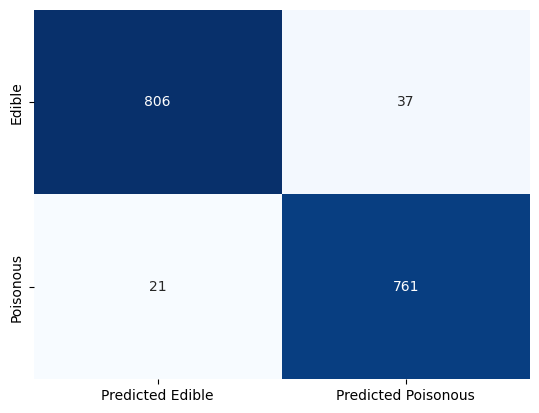

In [29]:
from sklearn.metrics import confusion_matrix

def visualise_conf_matrix(test_target, test_target_prediction):
    # confusion matrix
    cm = confusion_matrix(test_target, test_target_prediction)

    sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'], \
                xticklabels=['Predicted Edible', 'Predicted Poisonous'])

    plt.show()
    

visualise_conf_matrix(test_target, test_target_prediction)

The confusion matrix reveals that the model has correctly predicted 1567 out of 1625 observations, which is a decent result.
<br>
<br>

### 6. Parameter Tuning

#### What is Parameter Tuning?
It is the process of optimising a model's performance without overfitting or generating an excessive amount of variance by selecting the appropriate hyperparameters [5].

#### When does overfitting occur?
Overfitting occurs when a model performs well on training data but poorly on unseen data.
<br>
<br>
<br>
That's where Cross-validation enters the picture.
<br>
<br>
<br>

#### What is K-fold Cross-validation?
K-fold Cross-validation is very similar to the Hold-out method, but it’s applied to more subsets. 
<br>
<br>
During K-fold Cross-validation, we do many splits, not just one like how the Hold-out method does. We are able to divide our data into 3, 5, 10, or any K number of splits/folds.
<br>
<br>

The data set is divided into five parts if we utilise 5-folds. A different part turns into the test set in every iteration.
<br>
<br>
In the first iteration, we use the first part of the data for testing. Then, as illustrated in the
image below, we use the other parts of the data set for training.

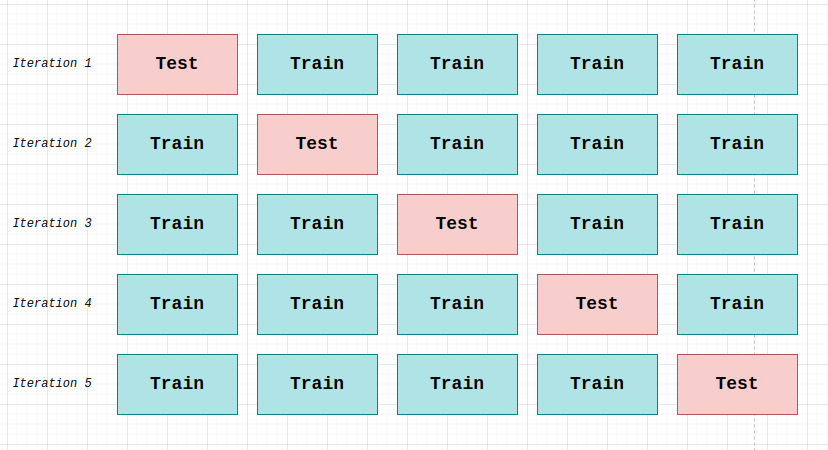

The image was created using [draw.io](https://www.draw.io/connect/office365/index.html) but was inspired from [How to Implement K fold Cross-Validation in Scikit-Learn
](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/) article.
<br>
<br>
#### What problem would K-fold Cross-validation be able to help us with?
What if one subset of our data has only mushrooms from a specific cap, gill or only
mushrooms with the same stalk? Such a case would definitely lead to over-fitting but the goal is to avoid it.

<br>
<br>
<br>
The most popular number used for folds is 10 [7] and thus, that's the number we will move forward with.

In [30]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=42, shuffle=True)

The model will then be finalised by averaging it against each of the folds.

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features, target, scoring="accuracy", cv=10)

print("Cross validation scores:", scores, "\n")
print("Average accuracy: {}".format(scores.mean() * 100))

Cross validation scores: [0.68265683 0.88683887 0.9901599  0.99261993 0.908867   0.86330049
 1.         0.99753695 0.62068966 0.99507389] 

Average accuracy: 89.37743503050794


<br>

#### GridSearchCV

When fitting our model, we may test out all the possible combinations while specifying various values for each hyperparameter. 
<br>
<br>
GridSearchCV's outcome is the collection of hyperparameters (out of the various values provided) that best suit our data in terms of the scoring metric we want our model to optimize on [7]. In our case, the 'accuracy' metric is chosen.
<br>
<br>

In [32]:
import numpy as np

# a dictionary of parameters
parameters = {
'penalty' : ['l1','l2'],   
'C'       : np.logspace(-3,3,7),
'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

The parameter grid (a dictionary containing all the various hyperparameters) used below was taken from a Medium article, [Tuning the Hyperparameters of your Machine Learning Model using GridSearchCV](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27).
<br>
<br>
<br>

In [36]:
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(model, # Model
                    param_grid=parameters, # Hyperparameters
                    scoring='accuracy', # Metric for scoring
                    cv=10) # Number of folds


# Train the model with the training_model set
clf.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

<br>
<br>

GridSearchCV makes an effort to improve our score by adjusting the given parameters in order to identify the best ones.

In [37]:
print("Best tuned hyperparameters :", clf.best_params_, "\n")
print("Accuracy using GridSearchCV:", clf.best_score_ * 100)

Best tuned hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'} 

Accuracy using GridSearchCV: 100.0


<br>
<br>

### 7. Making Predictions

<b> Logistic Regression: </b> 96.43076923076923
<br>
<b> After using K-fold Cross-Validation and GridSearchCV: </b> 100.0

It is clear from comparing the two scores that using K-fold Cross-Validation along with GridSearchCV assisted us in improving the performance of our model.
<br>
<br>
<br>

### 8. Food for thought

The question, "Have we employed the wrong techniques?" started running through my head when I unintentionally came across this Medium post titled [100% Accurate Mushroom Classification in Python](https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace), which used the same dataset we did and achieved the same accuracy score of 100% without the use of any parameter tuning techniques at all.
<br>
<br>
After wrapping my head around and going through all the steps that the article's author went, I realised that One Hot Encoding was used, whereas we encoded our categorical data with Label Encoding.
<br>
<br>
This [Mushroom Labelling](https://mrtjwhipple.medium.com/mushroom-labelling-db941388f0d0) article on Medium and [Training a machine to determine whether a mushroom is edible](https://inmachineswetrust.com/posts/mushroom-classification/) article on "In Machines We Trust" website shed light on as to what was the reason.
<br>
<br>
<br>
#### When should label encoding be used, then?
When the distinct values of each categorical feature are ordinal. 
#### What does the term ordinal mean?
It's when the data values can have some hierarchy or order. 
#### What kind of label encoding example may there be?
For instance, since T-shirt sizes might range from small to extra large, it seems reasonable to list them as 1, 2, 3, and 4.
<br>
<br>
<br>
#### All of this makes sense, so why didn't it apply to our situation?
All our categorical variables were nominal.
#### What does the term nominal mean?
It's when the data has no inherent order.
#### Why did our data lack any kind of inherent order?
Examples of possible colours for the cap-color feature were brown, buff, cinnamon, grey, punk, purple, red, white, and yellow. However, yellow doesn't have a value four times that of brown. Therefore, it makes no sense to label yellow as 8 and brown as 4.
#### How do we know that yellow was 8 and brown was 4?
The Label Ecoder method converts the attributes to integers depending on their alphabetical order.
<br>
<br>
Since we had "cap-color":
 - **"brown"** (= n) 
 - **"buff"** (= b) 
 - **"cinnamon"** (= c) 
 - **"gray"** (= g)
 - **"green"** (= r)
 - **"pink"** (= p) 
 - **"purple"** (= u) 
 - **"red"** (= e) 
 - **"white"** (= w) 
 - **"yellow"** (= y)
<br>

As a result, it can be said that yellow was the final attribute, while brown was the first.
<br>
<br>
<br>
<br>

It can finally be said that using One Hot Encoding for the nominal categorical data in the [100% Accurate Mushroom Classification in Python](https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace) article makes sense now.
<br>
<br>
<br>

#### Based on the above discovery, has everything we have learned up to this point been for nothing?
1. Every piece of knowledge we pick up is never wasted.
2. Not really as using One hot encoding allows more possible combinations, which greatly complicates our task.

#### How does One Hot Encoding complicates our task?
As it adds a new column for each attribute of each feature, the number of columns will rapidly rise. That's where the curse of dimensionality comes. You can read more about it here, [The Curse of Dimensionality](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e).

#### How do we know that our dataset would not have the best result?
Let's quickly demonstrate what the author of the [100% Accurate Mushroom Classification in Python](https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace) article did by using One hot encoding while avoiding simply one step.

Accuracy score: 100.0


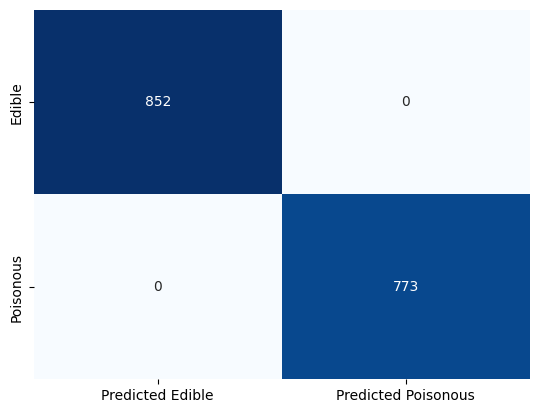

In [35]:
# Load file and get it as a dataframe
df1 = get_df_from_file()

### THIS IS THE STEP WE ARE AVOIDING ###
# Replace missing values
#df1['stalk-root'].fillna(df1['stalk-root'].mode()[0], inplace=True)
########################################

dummies_columns1 = [list(df1.columns)[i] for i in np.arange(1,23)]
df1 = pd.get_dummies(df1, columns=dummies_columns1)

# Map target variable class: 1 = poisonous, 0 = edible
df1['class'] = df1['class'].map({"p": 1, "e": 0})

# Split data
features = df1.iloc[:, 1:]
target = df1.iloc[:, 0]

# Training set and test set
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=0)

# Feature scaling
train_features, test_features = standardise_data(train_features, test_features)

# Choose Logistic Regression as our model and fit it
model = LogisticRegression()
model.fit(train_features, train_target)

# Get the prediction of the target of the test set
test_target_prediction = model.predict(test_features)

# Print accuracy score
print("Accuracy score:", accuracy_score(test_target, test_target_prediction, normalize=True) * 100)

# Visualise confusion matrix
visualise_conf_matrix(test_target, test_target_prediction)

As can be seen, we have omitted the step of replacing the missing data. As a consequence, although having noise (2480 missing values), the model shows that is 100% accurate. This is the finest illustration of overfitting.
<br>
<br>

## Conclusion

Each method has its advantages and disadvantages.
<br>
<br>
Label Encoding and the One Hot Encoding both yielded models that over-fit the data and had extremely high validation scores [8].
<br>
<br>
I'll do more thorough investigation and update you on my findings soon.
<br>
<br>

## Sources:
1. [Why Logistic Regression?](https://kambria.io/blog/logistic-regression-for-machine-learning/)
2. [Mushroom Classification dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)
3. [What is Kaggle?](https://www.datacamp.com/blog/what-is-kaggle)
4. [80%-20% splitting strategy](https://medium.com/@karyaozmen/how-to-split-train-and-test-data-c1381d240fc4)
5. [What is Parameter Tuning?](https://riskspan.com/tuning-machine-learning-models/)
6. [The reason why K equals to 10 is the most popular value used](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/#:~:text=The%20key%20configuration%20parameter%20for,evaluate%20models%20is%20k%3D10.)
7. [The dictionary of hyperparameters used for tuning the hyperparameters using GridSearchCV](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)
8. [Mushroom Labelling](https://mrtjwhipple.medium.com/mushroom-labelling-db941388f0d0)